In [24]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

#1
1) If the sample size is large, we can generally expect a more felxible method to do better. This is because there are not many predictions to be made, and there is a lot of data to make accurate preditions with. the f will be more accurate
2) If the number of predictors is large, but the number of observations is small, it would most like be best to go with a less flexible method of prediction. This is because a more flexible method will need alot more data to make good predictions, but a less flexible method requires less data to get a better function accuracy
3) IF the predictors and repsonse is highly non-linear, it would be best to go with a more flexible method. This will lead a function that can more accuratly follow the datta and lead to less bias. The down side is, there might be alot of variance in the error because of the high variance in the data.
4) A less flexible model will be best if the variance is extermely high. It is more likely to make a better prediction when new data is introduced to the trained model.  

#4
1) Some real life applications for classification can be predicting whether by dog breed, if it will have a certain health condition. Say the dog breed is a golden retriever at a certain age, weight and exercise level, what is likely hood of future hip displacia. This problem would be inference because you would most likely get a probability. 
2) Regression is usefull when you want to predict one real-valued y. This can be done on a data set like sales, where you want to predict sales, and you can use the variables like customer, age, product, etc. The goal of this problem is prediction, because you are hoping to get real values that follow your past data and can predict the future. 
3) Cluster analyses can be useful when you have no idea what the data is telling you and it is catagorical. Cluster analysis allows you to put the dataset in groups and visual how those different groups look like. 

In [2]:
#Question 8
# Read the College dataset
df = pd.read_csv('C:/Users/Peyton Molino/Dropbox/For the alliance\'s shared workspace/Data processing/Introduction_to_Statistical_learning/datasets/College.csv')

df.index = df.iloc[:, 0]
df = df.drop(df.columns[0], axis=1)


In [3]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Unnamed: 0,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [4]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


array([[<Axes: xlabel='Apps', ylabel='Apps'>,
        <Axes: xlabel='Accept', ylabel='Apps'>,
        <Axes: xlabel='Enroll', ylabel='Apps'>,
        <Axes: xlabel='Top10perc', ylabel='Apps'>,
        <Axes: xlabel='Top25perc', ylabel='Apps'>,
        <Axes: xlabel='F.Undergrad', ylabel='Apps'>,
        <Axes: xlabel='P.Undergrad', ylabel='Apps'>,
        <Axes: xlabel='Outstate', ylabel='Apps'>,
        <Axes: xlabel='Room.Board', ylabel='Apps'>,
        <Axes: xlabel='Books', ylabel='Apps'>,
        <Axes: xlabel='Personal', ylabel='Apps'>,
        <Axes: xlabel='PhD', ylabel='Apps'>,
        <Axes: xlabel='Terminal', ylabel='Apps'>,
        <Axes: xlabel='S.F.Ratio', ylabel='Apps'>,
        <Axes: xlabel='perc.alumni', ylabel='Apps'>,
        <Axes: xlabel='Expend', ylabel='Apps'>,
        <Axes: xlabel='Grad.Rate', ylabel='Apps'>],
       [<Axes: xlabel='Apps', ylabel='Accept'>,
        <Axes: xlabel='Accept', ylabel='Accept'>,
        <Axes: xlabel='Enroll', ylabel='Accept'>,
    

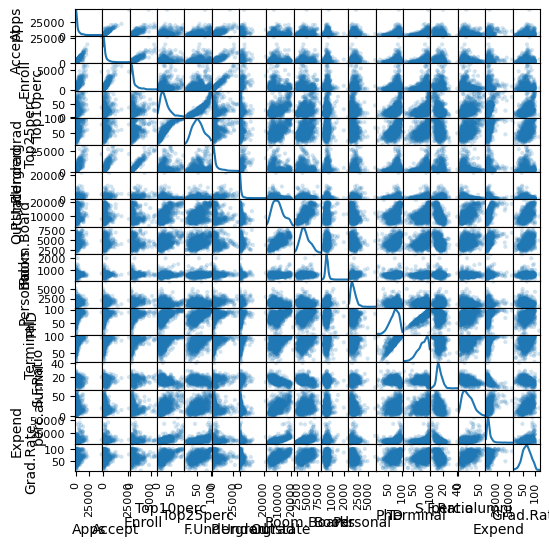

In [6]:
from pandas.plotting import scatter_matrix

scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')

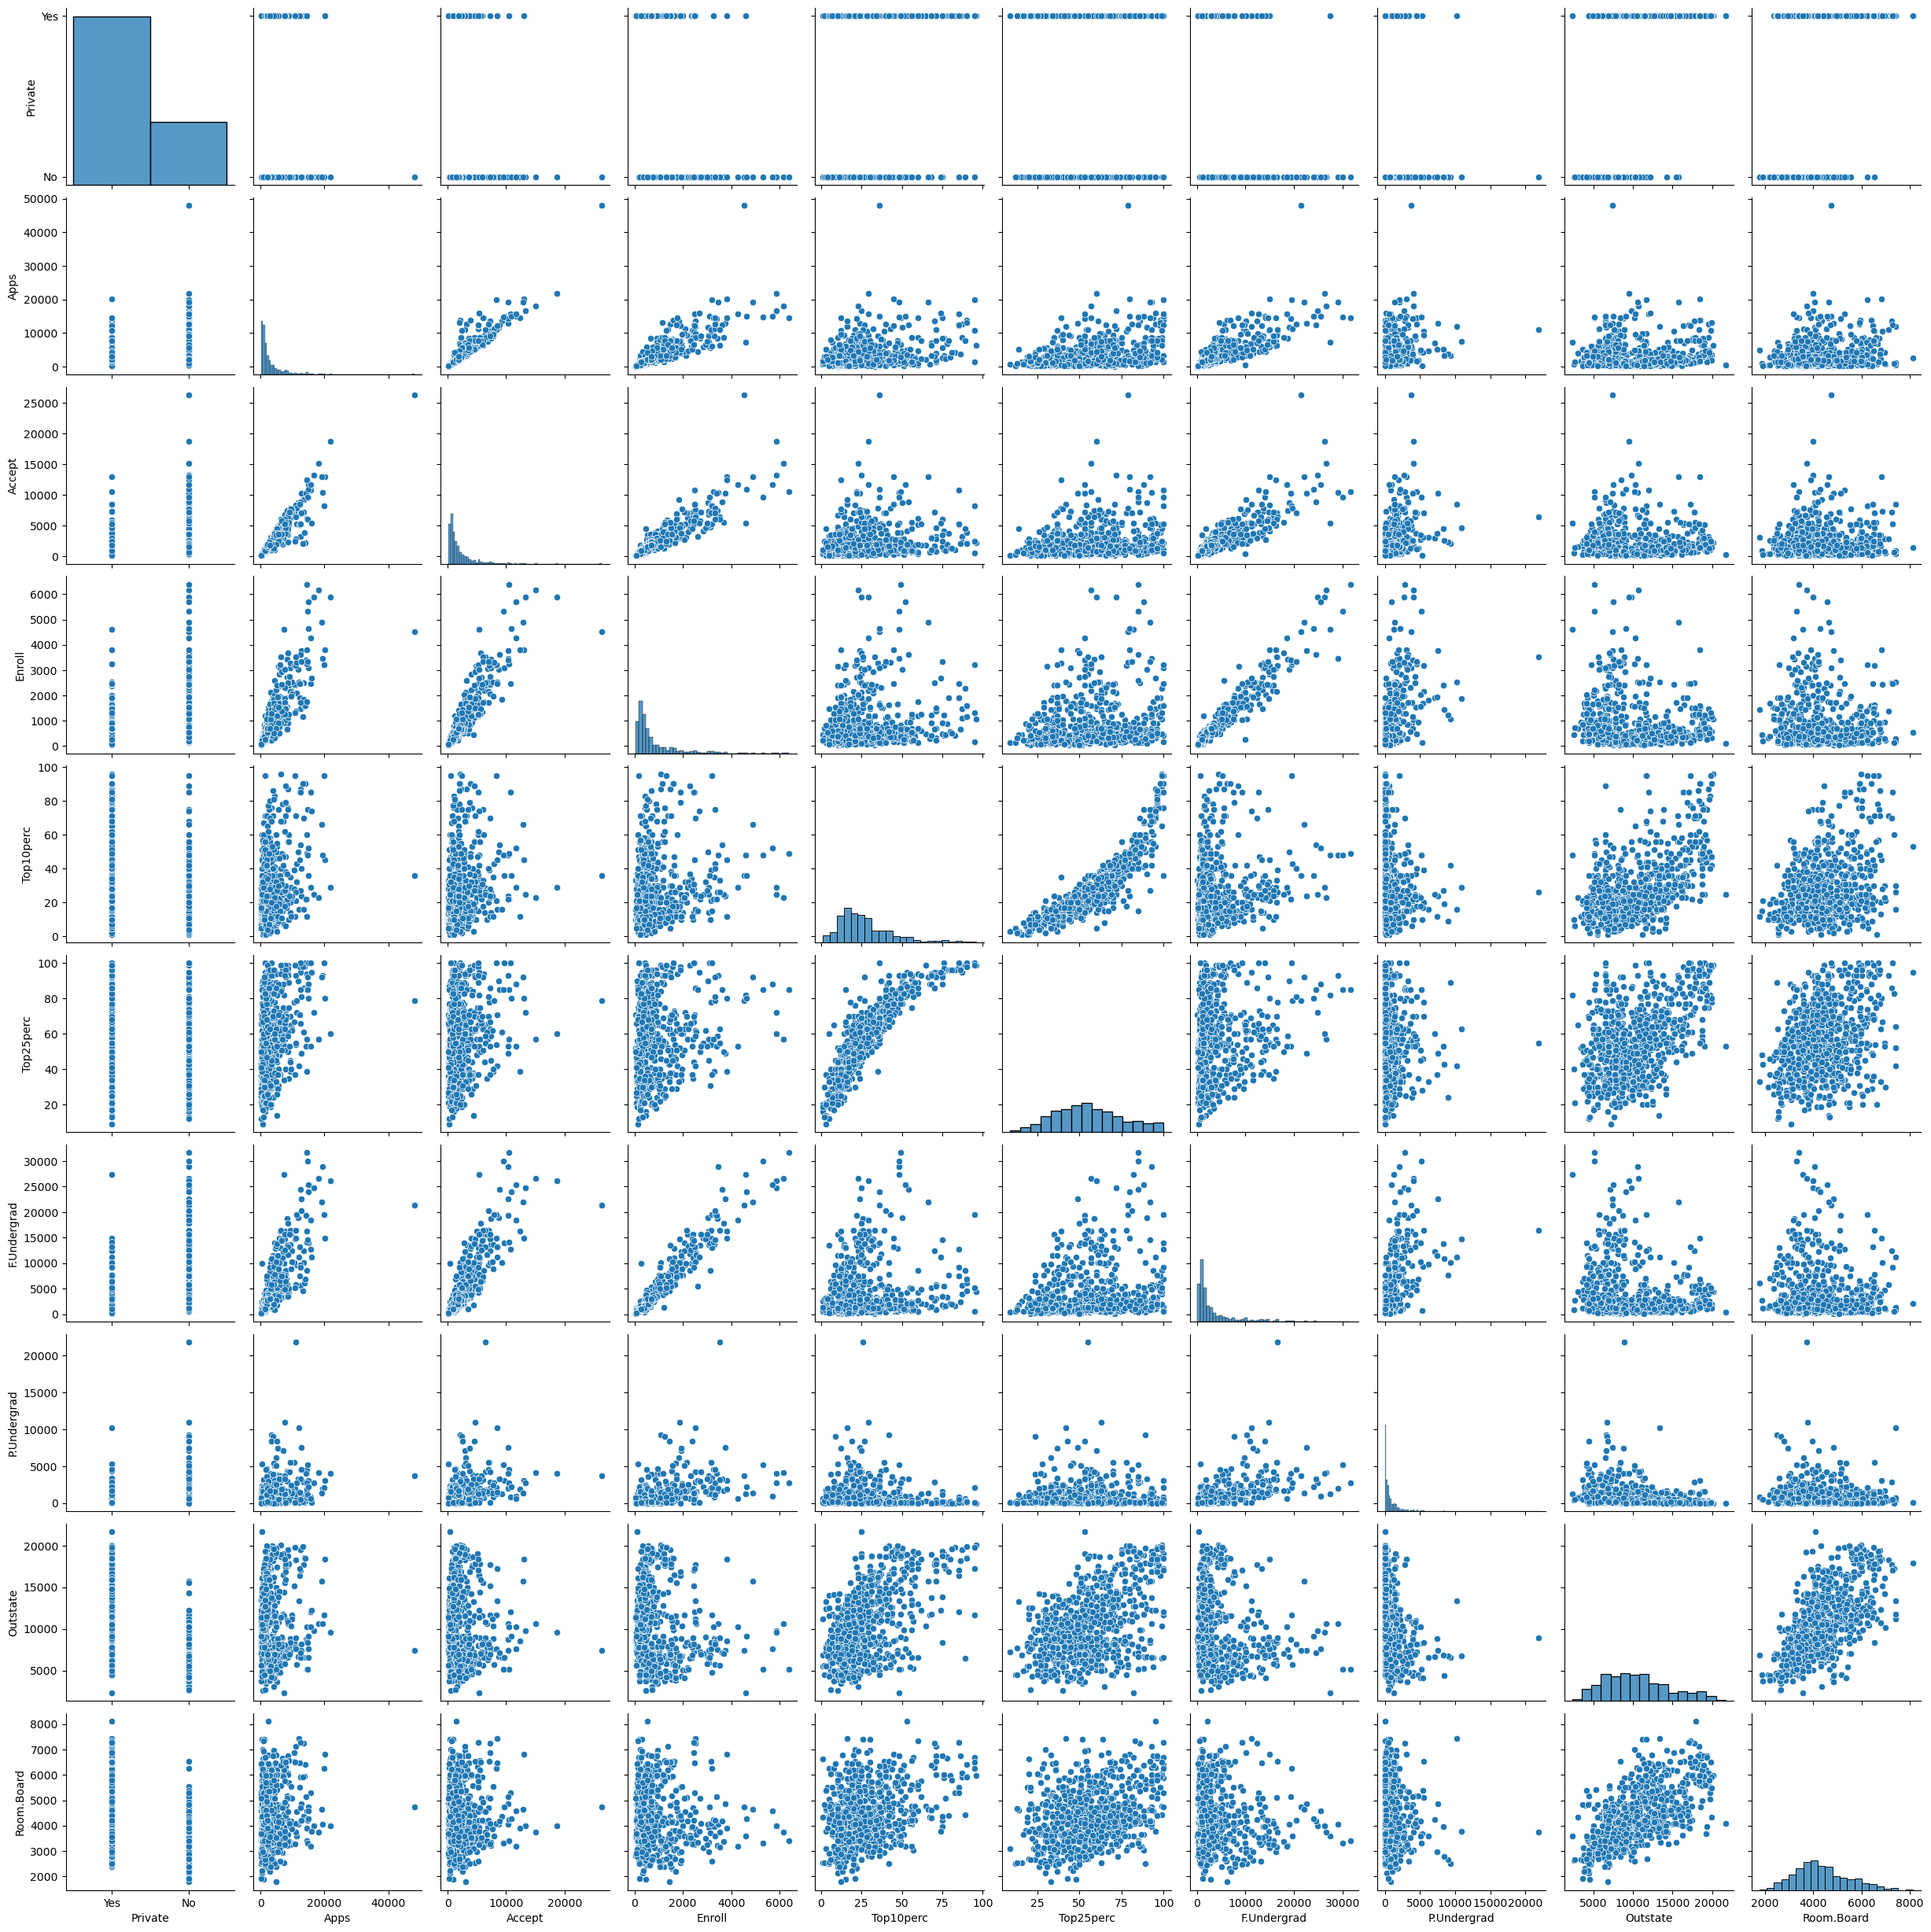

In [7]:
column_names = df.columns[:10].tolist()
sns.pairplot(df, vars=column_names)

<Axes: title={'center': 'Outstate'}, xlabel='Private'>

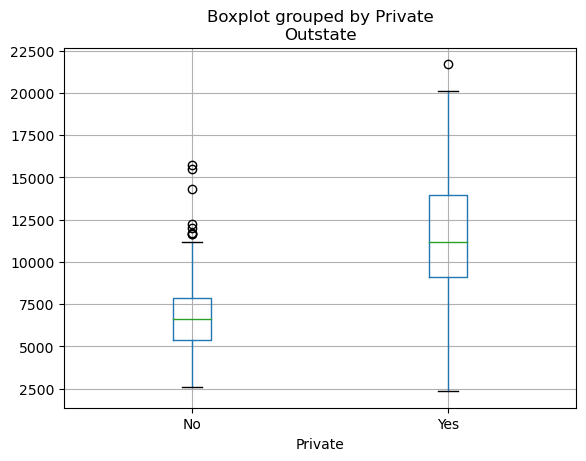

In [9]:
df.boxplot(column='Outstate', by='Private')

<Axes: title={'center': 'Outstate'}, xlabel='Elite'>

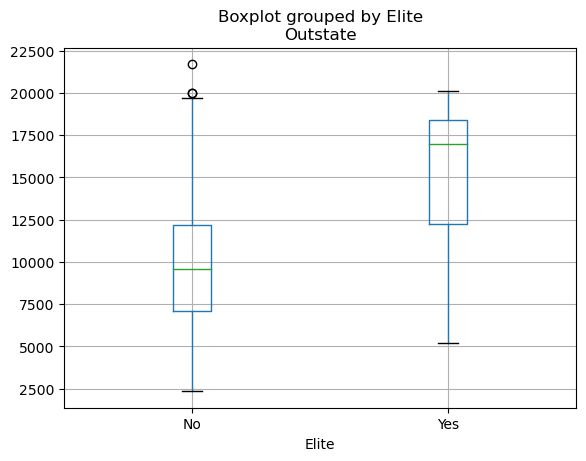

In [18]:
df['Elite'] = ['Yes' if x > 50 else 'No' for x in df['Top10perc']]
df['Elite'].value_counts()
df.boxplot(column='Outstate', by='Elite')


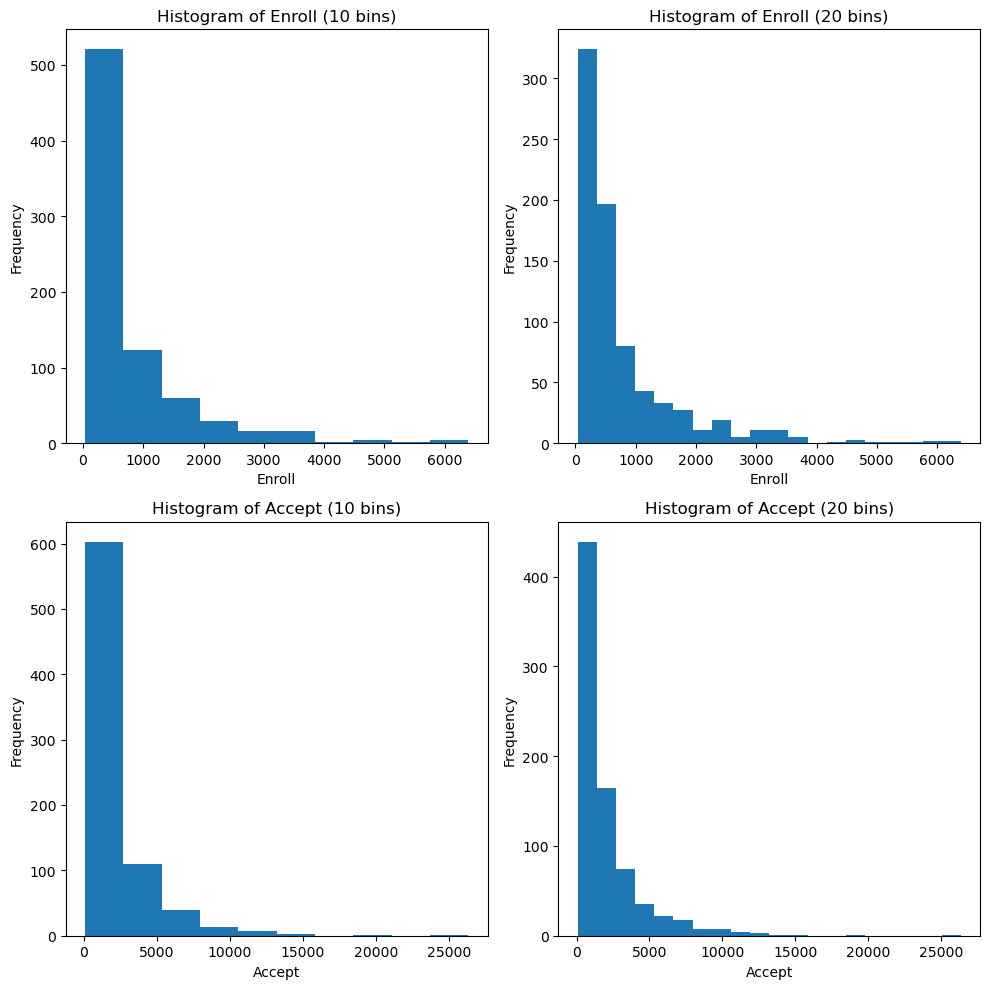

In [23]:


fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Histogram for 'Enroll' with 10 bins
axs[0, 0].hist(df['Enroll'], bins=10)
axs[0, 0].set_title('Histogram of Enroll (10 bins)')
axs[0, 0].set_xlabel('Enroll')
axs[0, 0].set_ylabel('Frequency')

# Histogram for 'Enroll' with 20 bins
axs[0, 1].hist(df['Enroll'], bins=20)
axs[0, 1].set_title('Histogram of Enroll (20 bins)')
axs[0, 1].set_xlabel('Enroll')
axs[0, 1].set_ylabel('Frequency')

# Histogram for 'Accept' with 10 bins
axs[1, 0].hist(df['Accept'], bins=10)
axs[1, 0].set_title('Histogram of Accept (10 bins)')
axs[1, 0].set_xlabel('Accept')
axs[1, 0].set_ylabel('Frequency')

# Histogram for 'Accept' with 20 bins
axs[1, 1].hist(df['Accept'], bins=20)
axs[1, 1].set_title('Histogram of Accept (20 bins)')
axs[1, 1].set_xlabel('Accept')
axs[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [27]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplot layout
fig = make_subplots(rows=2, cols=2)

# Add histograms to subplots
fig.add_trace(go.Histogram(x=df['Enroll'], nbinsx=10), row=1, col=1)
fig.add_trace(go.Histogram(x=df['Enroll'], nbinsx=20), row=1, col=2)
fig.add_trace(go.Histogram(x=df['Accept'], nbinsx=10), row=2, col=1)
fig.add_trace(go.Histogram(x=df['Accept'], nbinsx=20), row=2, col=2)

# Update layout
fig.update_layout(height=600, width=800, title_text="Subplots of histograms")

fig.show()